In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [98]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [99]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [100]:
def compute_loss(y, tx, w):
    """Calculate the loss."""
    N = tx.shape[0]
    cost = 1/N * (y - tx @ w).T @ (y - tx @ w)
    return cost
# print(compute_loss(y, tx, [1, 2]))


# 2 Grid Search

Fill in the function `grid_search()` below:

In [101]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    for idx_0, w0_elem in enumerate(w0):
        for idx_1, w1_elem in enumerate(w1):
            losses[idx_0, idx_1] = compute_loss(y, tx, np.asarray([w0_elem, w1_elem]))
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356497, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.019 seconds


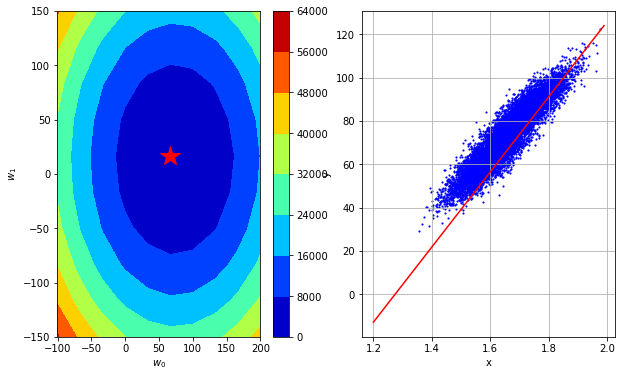

In [102]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [103]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    gradient = -2/np.shape(tx)[0] * tx.T @ (y - tx @ w)
    # ***************************************************
    assert np.shape(gradient) == np.shape(w)
    return gradient

Please fill in the functions `gradient_descent` below:

In [104]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        dw = compute_gradient(y, tx, w)
        w = w - gamma * dw
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [105]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518334, w0=14.658784400421027, w1=2.6959424869977586
Gradient Descent(1/49): loss=3585.140831597294, w0=26.385811920757874, w1=4.852696476595991
Gradient Descent(2/49): loss=2305.5679714878243, w0=35.76743393702738, w1=6.578099668274586
Gradient Descent(3/49): loss=1486.6413410177618, w0=43.27273155004294, w1=7.958422221617478
Gradient Descent(4/49): loss=962.5282975169247, w0=49.27696964045539, w1=9.062680264291775
Gradient Descent(5/49): loss=627.0959496763892, w0=54.080360112785364, w1=9.946086698431223
Gradient Descent(6/49): loss=412.4192470584457, w0=57.923072490649346, w1=10.652811845742791
Gradient Descent(7/49): loss=275.0261573829619, w0=60.997242392940514, w1=11.218191963592046
Gradient Descent(8/49): loss=187.09457999065276, w0=63.45657831477345, w1=11.670496057871445
Gradient Descent(9/49): loss=130.8183704595749, w0=65.4240470522398, w1=12.032339333294962
Gradient Descent(10/49): loss=94.8015963596851, w0=66.99802204221288, w1=12.32

<function __main__.plot_figure>

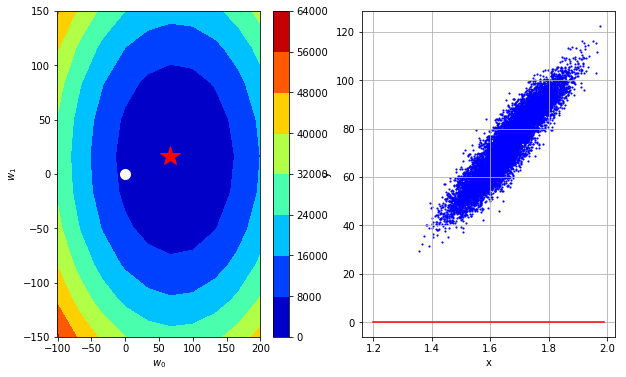

In [106]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [110]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    return compute_gradient(t, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    num_batches = int(np.shape(tx)[0]/batch_size)
    for epoch_num in range(max_iters):
        for batch_idx in range(num_batches-1):
            tx_batch = tx[batch_idx * batch_size : (batch_idx + 1)*batch_size]
            y_batch = y[batch_idx * batch_size : (batch_idx + 1)*batch_size]
            dw = compute_gradient(y_batch, tx_batch, w)
            w = w - gamma * dw
            # store w and loss
            loss = compute_loss(y, tx, w)
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=epoch_num, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [111]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.01
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=149.23111693710902, w0=62.56993588158218, w1=11.620824895012472
Gradient Descent(1/49): loss=36.43137243583583, w0=70.94488894272497, w1=13.103361024581373
Gradient Descent(2/49): loss=32.314559738515754, w0=72.0660926029723, w1=13.2920452628946
Gradient Descent(3/49): loss=31.96001127518039, w0=72.21622428225437, w1=13.315995721883963
Gradient Descent(4/49): loss=31.91609383500287, w0=72.23633122826242, w1=13.319026864925306
Gradient Descent(5/49): loss=31.910281263464345, w0=72.23902466019712, w1=13.319409210315216
Gradient Descent(6/49): loss=31.909504627473964, w0=72.23938553135955, w1=13.319457258216254
Gradient Descent(7/49): loss=31.909400708458584, w0=72.2394338911883, w1=13.31946327045237
Gradient Descent(8/49): loss=31.909386798347704, w0=72.23944037311061, w1=13.319464019078492
Gradient Descent(9/49): loss=31.909384935997032, w0=72.23944124208992, w1=13.3194641117658
Gradient Descent(10/49): loss=31.90938468660687, w0=72.23944135861021, w1=13.319

<function __main__.plot_figure>

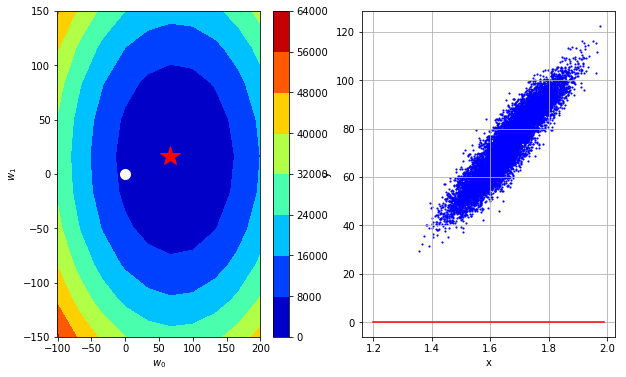

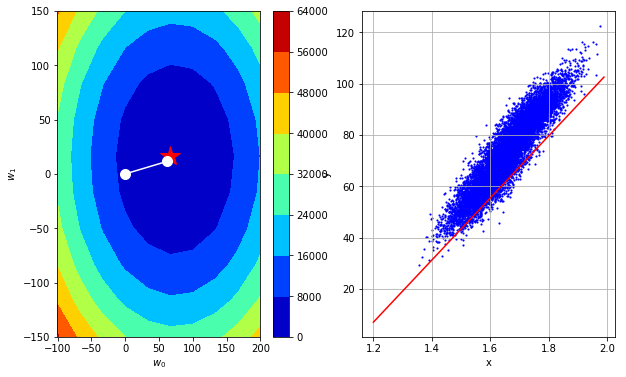

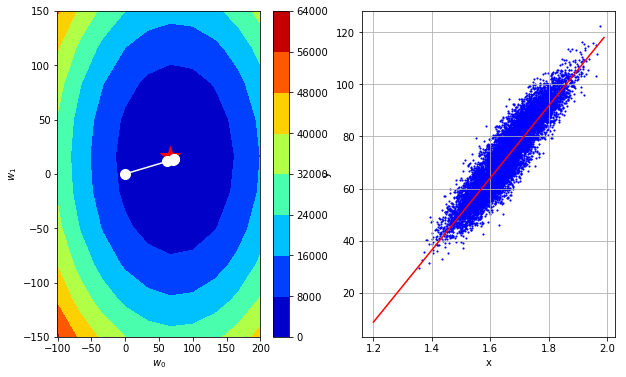

In [112]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(0/499): loss=3811.1447934585167, w0=14.07288311243601, w1=2.0966300245379426
Gradient Descent(1/499): loss=2545.839255152703, w0=25.471918433509178, w1=3.7949003444136755
Gradient Descent(2/499): loss=1715.6722914702589, w0=34.705137043578446, w1=5.170499303513016
Gradient Descent(3/499): loss=1170.9997465982074, w0=42.18404411773455, w1=6.28473446038348
Gradient Descent(4/499): loss=813.6400899076541, w0=48.241958847801, w1=7.187264937448556
Gradient Descent(5/499): loss=579.1764191529824, w0=53.14886977915482, w1=7.9183146238712645
Gradient Descent(6/499): loss=425.34480477084236, w0=57.123467633551414, w1=8.510464869873658
Gradient Descent(7/499): loss=324.4158825747201, w0=60.34289189561266, w1=8.990106569135595
Gradient Descent(8/499): loss=258.1964167218445, w0=62.95062554788226, w1=9.378616345537763
Gradient Descent(9/499): loss=214.7498251757728, w0=65.06288980622064, w1=9.69330926442352
Gradient Descent(10/499): loss=186.2445164623953, w0=66.77382385547472, w1

Gradient Descent(367/499): loss=5.310579274085321, w0=72.62574257425739, w1=15.974076482525339
Gradient Descent(368/499): loss=5.310629845778041, w0=72.63366336633659, w1=15.977343955766845
Gradient Descent(369/499): loss=5.310577603600108, w0=72.62574257425739, w1=15.973074515187617
Gradient Descent(370/499): loss=5.310583126439943, w0=72.62574257425739, w1=15.975751772355236
Gradient Descent(371/499): loss=5.3105840000161795, w0=72.62574257425739, w1=15.972072547849896
Gradient Descent(372/499): loss=5.310580822400704, w0=72.62574257425739, w1=15.974749805017515
Gradient Descent(373/499): loss=5.3106318908506225, w0=72.63366336633659, w1=15.97801727825902
Gradient Descent(374/499): loss=5.310578518361465, w0=72.62574257425739, w1=15.973747837679793
Gradient Descent(375/499): loss=5.310628847589847, w0=72.63366336633659, w1=15.9770153109213
Gradient Descent(376/499): loss=5.310579701621763, w0=72.62574257425739, w1=15.972745870342072
Gradient Descent(377/499): loss=5.310582370716087, 

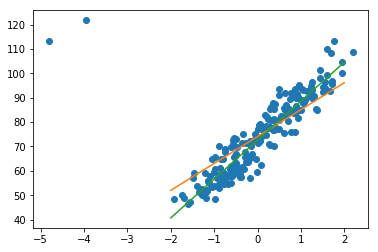

In [91]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.plot(tx[:, 1], y, 'o')


# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.05
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()
w = sgd_ws[-1]
y_MSE = w[0] + w[1] * np.linspace(-2, 2, 100)
plt.plot(np.linspace(-2,2,100), y_MSE)
# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

def compute_MAE(y, tx, w):
    N = np.shape(tx)[0]
    cost = 1/N * np.sum(np.abs((y - tx @ w)))
    return cost

def compute_gradient_MAE(y, tx, w):
    N = np.shape(tx)[0]
    gradient = -1/np.shape(tx)[0] * tx.T @ np.sign(y - tx @ w)
    return gradient

def stochastic_gradient_descent_MAE(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    num_batches = int(np.shape(tx)[0]/batch_size)
    for epoch_num in range(max_iters):
        for batch_idx in range(num_batches):
            tx_batch = tx[batch_idx * batch_size : (batch_idx + 1)*batch_size]
            y_batch = y[batch_idx * batch_size : (batch_idx + 1)*batch_size]
            dw = compute_gradient_MAE(y, tx, w)
            w = w - gamma * dw
            # store w and loss
        loss = compute_MAE(y, tx, w)
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=epoch_num, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws
    
max_iters = 500
gamma = 0.8
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_MAE(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()
w = sgd_ws[-1]
y = w[0] + w[1] * np.linspace(-2, 2, 100)
plt.plot(np.linspace(-2,2,100), y)
# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))


### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)